## 双向循环神经网络和深层循环神经网络
在经典的循环神经网络中，状态的传输是由前往后单向的。然而，当前时刻的输出不仅和之前的装填有关系，也和之后的状态相关。双向循环神经网络(bidirectional RNN)就是解决这类问题。
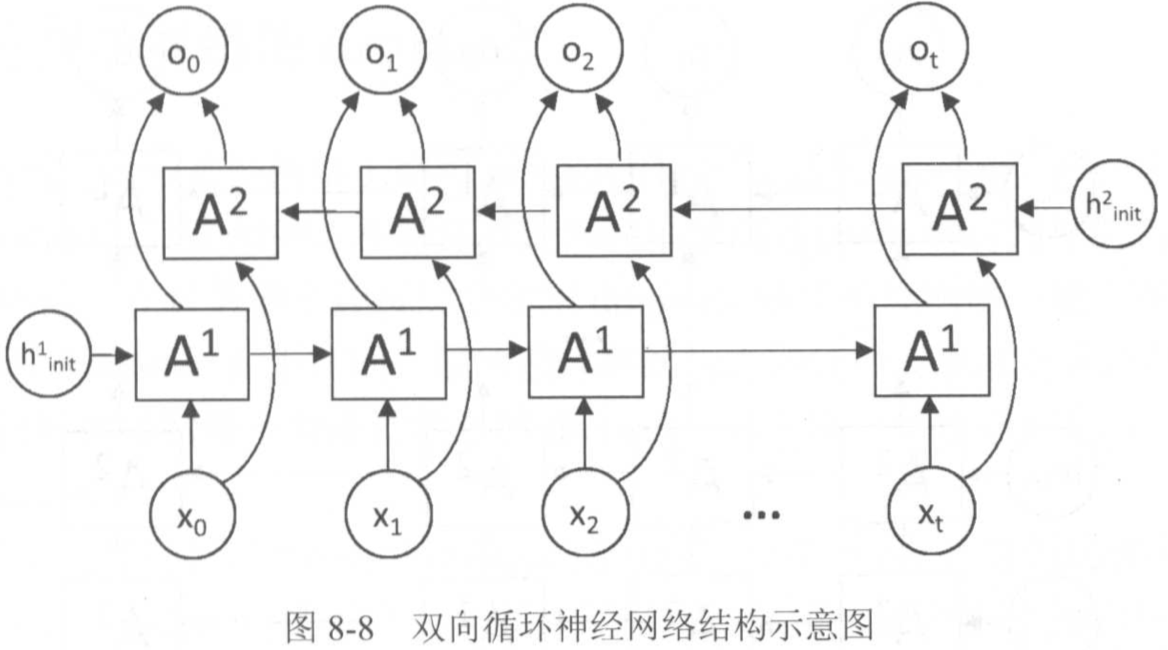
双向循环神经网络的主题结构就是两个单向循环神经网络的结合。在每一个时刻t，输入会同时提供个这个方向相反的循环神经网络。两个网络独立进行计算，各自产生该时刻的新状态和输出，而双向循环网络的最终输出是这个两个简单循环网络的输出的`简单拼接`。两个循环神经网络除了方向不同之外，其余结构完全对称。每一层网络中的循环体可以自动选用任意结构。

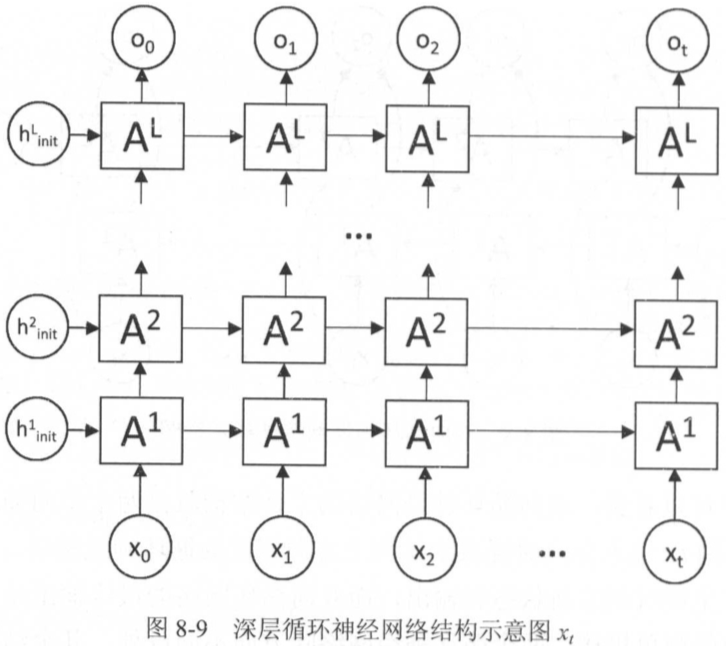
深层循环神经网络(Deep RNN)是循环神经网络的另一种变种。为了增强模型的表达能力，可以在网络中设置多个循环层，将每层循环网络的输出传给下一层进行处理。在一个$L$层的深层循环网络中，每一时刻的输入$x_t$到输出$o_t$之间有$L$个循环体，网络因此可以从输入中抽取更多高层的信息。和卷积网络类似，每一层的循环体中参数是一致的，而不同层中的参数可以不同。<br/>
TensorFlow中提供MultiRNNCell类实现深层循环神经网络的前向传播实现。

In [ ]:
# 定义一个基本的LSTM结构作为循环体的基础结构
lstm_cell = tf.nn.rnn_cell.BasicLSTMCell
# 通过MultiRNNCell类实现深层循环神经网络中每一时刻的前向传播过程
# number_of_layers表示有多少层
# 不能使用[lstm_cell(lstm_size)]*N的形式来初始化，否则TF会在每一层
# 之间共享参数
stacked_lstm = tf.nn.rnn_cell.MultiRNNCell(
    [lstm_cell(lstm_size) for _ in range(number_of_layers)])
# 通过zero_state函数来获取初始状态
state = stacked_lstm.zero(batch_size, tf.float32)
# 计算每一时刻的前向传播结果
for i in range(len(num_steps)):
    if i > 0: tf.get_varibale_scope.reuse_variables()
    
    stacked_lstm_output, state = stacked_lstm(current_input, state)
    final_output = fully_connected(stacked_lstm_output)
    loss += calc_loss(final_output, excepted_output)

## 循环神经网络的dropout
通过dropout，可以让卷积神经网络更加健壮。类似，在循环神经网络中使用dropout也有同样的功能。循环神经网络一般只在不同层循环体结构之间使用dropout，而不在同一层的循环体结构之间使用。
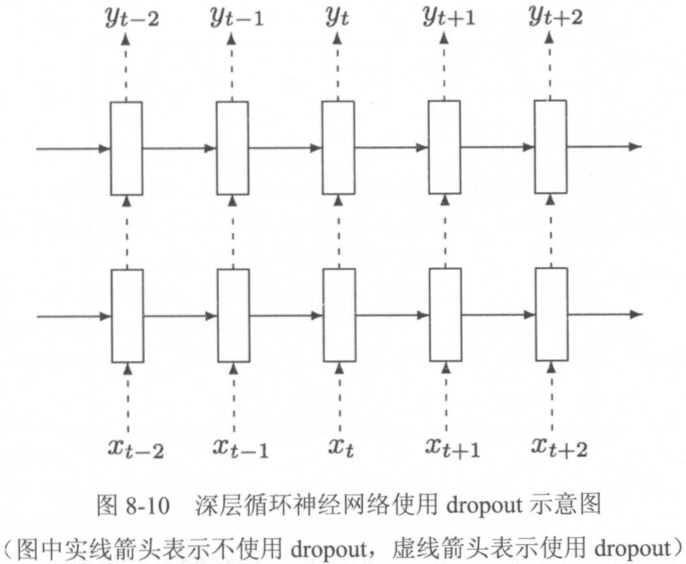
在TensorFlow中，使用DropoutWrapper类可以很容易实现dropout功能。<br/>

In [ ]:
# 定义lstm结构
lstm_cell = tf.nn.rnn_cell.BasicLSTMCell
# 使用DropoutWrapper类来实现dropout功能
# 通过两个参数来控制dropout的概率
# input_keep_prob：用来控制输入的dropout概率
# output_keep_prob：用来控制输出的dropout概率
# 在使用了DropoutWrapper的基础上定义MultiRNNCell
stacked_lstm = rnn_cell.MultiRNNCell(
    [tf.nn.rnn_cell.DropoutWrapper(lstm_cell(lstm_size)) 
     for _ in range(number_of_layers)])